In [54]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [22]:
start = '2015-01-01'
end = dt.datetime.now()
test_days = 60

In [23]:
df_btc= web.DataReader('BTC-USD', data_source='yahoo', start=start, end=end)
df_btc

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-01,320.434998,314.002991,320.434998,314.248993,8.036550e+06,314.248993
2015-01-02,315.838989,313.565002,314.079010,315.032013,7.860650e+06,315.032013
2015-01-03,315.149994,281.082001,314.846008,281.082001,3.305440e+07,281.082001
2015-01-04,287.230011,257.612000,281.145996,264.195007,5.562910e+07,264.195007
2015-01-05,278.341003,265.084015,265.084015,274.473999,4.396280e+07,274.473999
...,...,...,...,...,...,...
2021-12-05,49768.148438,47857.496094,49201.519531,49368.847656,3.719820e+10,49368.847656
2021-12-06,50929.519531,47281.035156,49413.480469,50582.625000,3.770731e+10,50582.625000
2021-12-07,51934.781250,50175.808594,50581.828125,50700.085938,3.367681e+10,50700.085938


In [24]:
bitcoin= df_btc.filter(['Close'])

In [25]:
bitcoin_data = bitcoin.values
bitcoin.values

array([[  314.24899292],
       [  315.03201294],
       [  281.08200073],
       ...,
       [50700.0859375 ],
       [50504.796875  ],
       [49403.859375  ]])

In [26]:
training_len= math.ceil(len(bitcoin)*0.8)
training_len

2025

In [27]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(bitcoin_data)

In [28]:
train_data=scaled_data[:training_len]
train_data

array([[0.00202031],
       [0.00203193],
       [0.00152813],
       ...,
       [0.13287274],
       [0.13315714],
       [0.13327062]])

In [29]:
train_data.shape

(2025, 1)

In [31]:
x_train=[]
y_train=[]

for i in range(test_days, len(train_data)):
    x_train.append(train_data[i-test_days:i])
    y_train.append(train_data[i])

In [34]:
print(len(x_train),len(y_train))

1965 1965


In [35]:
x_train

[array([[0.00202031],
        [0.00203193],
        [0.00152813],
        [0.00127754],
        [0.00143008],
        [0.00160392],
        [0.00172483],
        [0.00156177],
        [0.00166652],
        [0.00143485],
        [0.00129928],
        [0.00133098],
        [0.00070869],
        [0.        ],
        [0.00047101],
        [0.00044509],
        [0.00031395],
        [0.00047836],
        [0.00054546],
        [0.00049284],
        [0.00072407],
        [0.00082066],
        [0.00081284],
        [0.00103495],
        [0.00112207],
        [0.00141522],
        [0.00126686],
        [0.00082821],
        [0.00082224],
        [0.00071706],
        [0.00058409],
        [0.00072518],
        [0.00089223],
        [0.00072957],
        [0.00072341],
        [0.00057885],
        [0.00065535],
        [0.00073678],
        [0.00067235],
        [0.00062335],
        [0.00061933],
        [0.00060963],
        [0.0006479 ],
        [0.00085065],
        [0.00117554],
        [0

In [36]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [37]:
#Reshape as Model needs three dimensional data
x_train= np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1965, 60, 1)

In [38]:
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(16))
model.add(Dense(1))

model.compile(optimizer='adam', loss ='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=10)



2021-12-09 15:29:01.588623: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-09 15:29:02.716245: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1965/1965 [==============================] - 112s 55ms/step - loss: 1.6951e-04
Epoch 2/10
1965/1965 [==============================] - 114s 58ms/step - loss: 9.7090e-05
Epoch 3/10
1965/1965 [==============================] - 114s 58ms/step - loss: 6.8675e-05
Epoch 4/10
1965/1965 [==============================] - 99s 50ms/step - loss: 5.5164e-05
Epoch 5/10
1965/1965 [==============================] - 94s 48ms/step - loss: 4.8814e-05
Epoch 6/10
1965/1965 [==============================] - 113s 57ms/step - loss: 4.7074e-05
Epoch 7/10
1965/1965 [==============================] - 84s 43ms/step - loss: 5.1129e-05
Epoch 8/10
1965/1965 [==============================] - 81s 41ms/step - loss: 4.0587e-05
Epoch 9/10
1965/1965 [==============================] - 80s 41ms/step - loss: 4.1724e-05
Epoch 10/10
1965/1965 [==============================] - 81s 41ms/step - loss: 4.3022e-05


In [39]:
test_data=scaled_data[training_len - test_days: , :]

In [40]:
x_test = []
y_test = bitcoin_data[training_len: , :]

for i in range(test_days, len(test_data)):
    x_test.append(test_data[i-test_days:i])

In [41]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [42]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [43]:
rmse= np.sqrt(np.mean(predictions - y_test)**2)
rmse

3761.5421948338685

In [44]:
train = bitcoin[: training_len]
valid = bitcoin[training_len :]
valid['Predictions'] = predictions

/var/folders/6p/2n2xjvq90xgcfnx6lv9svb7w0000gn/T/ipykernel_59302/2161862487.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


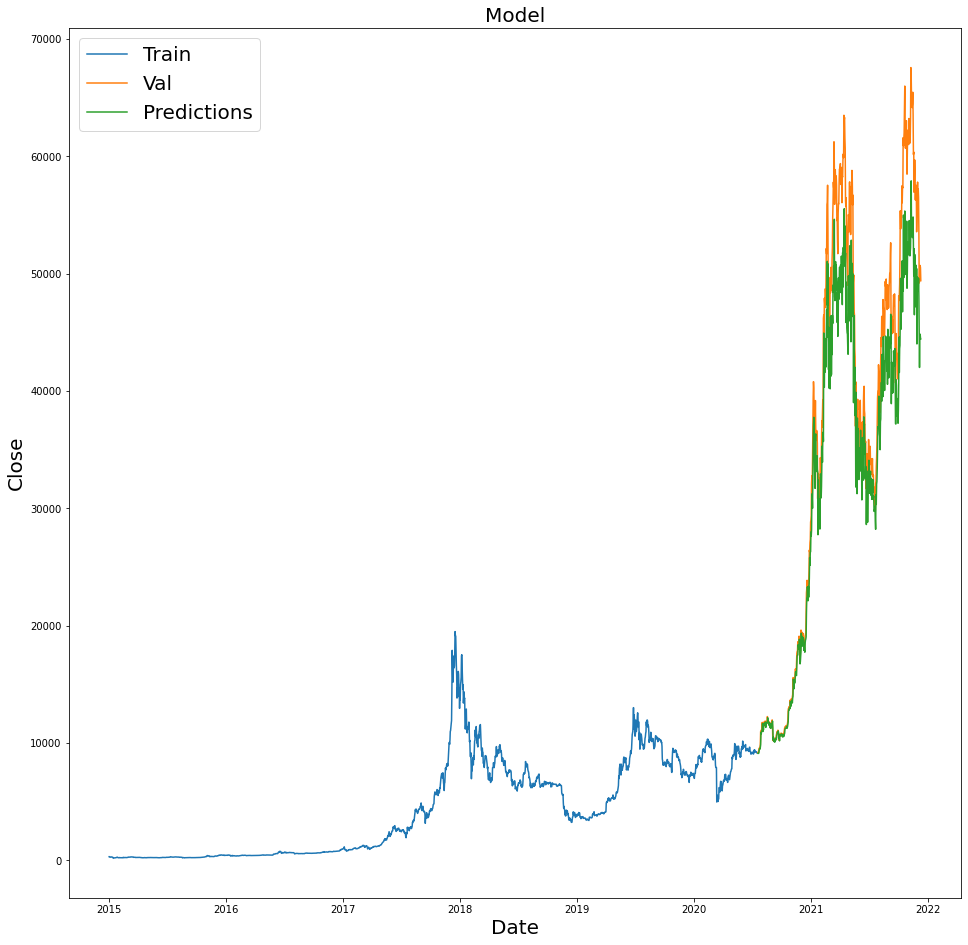

In [53]:
plt.figure(figsize=(16,16))
plt.title('Model', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close', fontsize=20)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], fontsize=20)


In [58]:
valid['Predictions']

Date
2020-07-19     9119.657227
2020-07-20     9144.174805
2020-07-21     9124.631836
2020-07-22     9321.616211
2020-07-23     9463.701172
                  ...     
2021-12-05    42005.800781
2021-12-06    44688.664062
2021-12-07    44845.796875
2021-12-08    44531.875000
2021-12-09    44443.550781
Name: Predictions, Length: 506, dtype: float32